<a href="https://colab.research.google.com/github/hanifabd/ID-Visualize-Tweet-Word-Frequency-using-WordCloud/blob/main/(ID)_Twitter_Word_Frequency_Vizualisation_using_Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tweet-preprocessor
! pip install sastrawi

In [126]:
# IMPORT LIBRARY
import tweepy as tp
import preprocessor as p
import re
import string
import matplotlib.pyplot as plt
from nltk import FreqDist
from wordcloud import WordCloud as wc
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [2]:
# API KEY FROM TWITTER DEVELOPER : USE YOUR OWN API KEY
cons_key = '#'
cons_secret = '#'
access_token = '#'
access_token_secret = '#'

In [4]:
# API SETTING
auth = tp.OAuthHandler(cons_key, cons_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth)

In [105]:
# GET TWEET WITH KEYWORD
keyword = 'vaksin covid' + " -filter:retweets"
data_tweets = tp.Cursor(api.search, q=keyword, lang='id', since='2020-10-30', tweet_mode='extended').items(1000)

# save tweet to var
data = []
for tweet in data_tweets:
  data.append(tweet.full_text)

In [106]:
# CHECK TWEET 
data[:3]

['Makin deket pilkada makin berkurang gini covid, jangan jangan vaksin dr koronya itu pilkada? 🤷\u200d♂️ https://t.co/G1qiNEGXbV',
 'Pengawasan Ketat Produksi Vaksin COVID-19 di Indonesia https://t.co/ZwvvOLjcMv',
 'Mau jadi reseller vaksin covid cara nya gimana ya?']

In [127]:
# CLEANING TWEET
tweets = []
for tweet in data:
  tweet = p.clean(tweet)
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  tweet = stopword.remove(tweet)
  tweet = tweet.lower()
  tweet = re.sub(r'[^\w\s]', '', tweet)
  tweets.append(tweet)

In [128]:
# CHECK TWEET 
tweets[:3]

['makin deket pilkada makin berkurang gini covid jangan jangan vaksin dr koronya pilkada',
 'pengawasan ketat produksi vaksin covid19 indonesia',
 'mau jadi reseller vaksin covid cara nya gimana ya']

In [136]:
# TOKENIZE TWEET
list_of_word = []
deleted_word = ['covid','covid19','vaksin','yg']
for tweet in tweets:
  tweet = tweet.split(' ')
  for word in tweet:
    if word not in deleted_word:
      list_of_word.append(word)

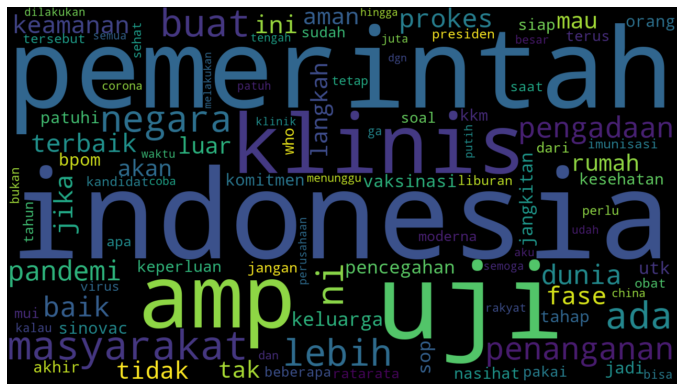

In [137]:
# VISUALIZE WORD
word_freq = FreqDist(list_of_word)
viz_word_freq = wc(width=1280, height=720, max_words=100).generate_from_frequencies(word_freq)

plt.figure(figsize=(12,8))
plt.imshow(viz_word_freq, interpolation='bilinear')
plt.axis('off')
plt.show()